# Importanto os Pacotes Necessários

In [21]:
import ipsimpy as ip
import matplotlib.pyplot as plt
import numpy as np

# Solução do Problema Direto
A solução do problema direto será definida da seguinte maneira:

$f(t)=ae^{-bt}$

sendo os valores de $a$ e $b$ os parâmetros de que queremos estimar.

Uma vez conhecida a expressão da solução e os parâmetros de interesse, vamos assumir o vetor de parâmetros como sendo $Z = (a,b)$. Note que ao criar a função que representa a soluçao do nosso problema direto um de seus argumentos precisa ser o vetor de parâmetros.

In [22]:
def Solucao(Z,t):
    a=Z[0]
    b=Z[1]
    return a*np.exp(-b*t)

### Definiçao dos Parâmetros Exatos

Em um problema real não conhecemos o valor dos parâmetros exatos mas, nesse tutorial, vamos assumir esses valores como sendo $a=1.0$ e $b=2.5$

In [23]:
Z_exato=np.array([1.0,2.5])

### Definição dos Dados Experimentais Sintéticos

Os parâmetros são recuperados a partir de um conjunto de dados experimentais.

Em nosso tutorial vamos considerar um conjunto de dados experimentais gerados artificialmente com 25 medições no intervalo $0 \leq t \leq 1$, note que no caso de um problema associado a uma EDP também seria necessário escolher uma posição.

In [24]:
t0 = 0 # tempo inicial
tf = 1 # tempo final

In [25]:
t_exp=np.linspace(0.1,tf,25) # tempo experimentais
t_exp

array([0.1   , 0.1375, 0.175 , 0.2125, 0.25  , 0.2875, 0.325 , 0.3625,
       0.4   , 0.4375, 0.475 , 0.5125, 0.55  , 0.5875, 0.625 , 0.6625,
       0.7   , 0.7375, 0.775 , 0.8125, 0.85  , 0.8875, 0.925 , 0.9625,
       1.    ])

Com os tempos experimentais, somos capazes de gerar agora o conjunto de dados exatos

In [26]:
Dados_Exatos=Solucao(Z_exato,t_exp) # dados exatos 

Sabemos que todo experimento está associado a erros experimentais, vamos simular esse erro adocionando um ruído gaussinao com média zero e desvio padrão igual a $0.01$. 

In [27]:
sigma = 0.01

In [28]:
Dados_Exp=Dados_Exatos + np.random.normal(0,sigma,len(t_exp))

Vejamos graficamente o conjunto gerado

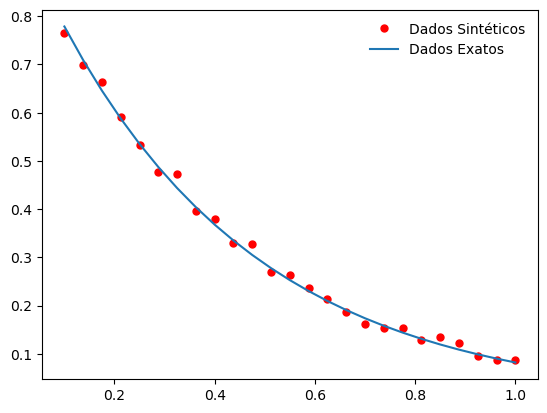

In [29]:
plt.plot(t_exp,Dados_Exp,".r",ms=10, label='Dados Sintéticos')
plt.plot(t_exp,Dados_Exatos, label='Dados Exatos')
plt.legend(frameon=False);

# Solução do Problema Inverso
Agora utilizaremos o pacote ipsimpy que foi carregado como ip. Será necessário informar ao Pacote algumas informações preliminares que correspondem aos dados e os tempos experimentais, além da função que representa a solução do problema direto.

In [30]:
def SPD(Z):
    a=Z[0]
    b=Z[1]
    return a*np.exp(-b*t_exp)

> note que utilizamos diretamente os tempos experimentais `t_exp`

Vamos definir nossa função objetivo como sendo a de mínimos quadrados

In [31]:
def FO(Z):
    Dados_Calc=SPD(Z)
    return np.dot(Dados_Calc - Dados_Exp, Dados_Calc - Dados_Exp)

Vamos testar nossa função objetivo considerando o vetor de parâmetros $Z=(1,1)$

In [33]:
FO(np.array([1.,1.]))

2.037507645143717

Nesse momento o pacote precisa saber:
* Os dados experimentais
* Os tempos experimentais
* A função objetivos
* A solução do problema direto 
* O número de parâmetros

In [32]:
ip.Definicoes_Preliminares.Set_Dados_Exp(Dados_Exp)
ip.Definicoes_Preliminares.Set_Tempos_Exp(t_exp)
ip.Definicoes_Preliminares.Set_FuncaoObjetivo(FO)
ip.Definicoes_Preliminares.Set_Solucao_PD(SPD)
ip.Definicoes_Preliminares.Set_Numero_Parametros(Z_exato.size)

Note que ao passar a função objetivo o ipsimpy passa a utilizá-la da seguinte maneira:

In [34]:
ip.Definicoes_Preliminares.FO(np.array([1.,1.]))

2.037507645143717

> A definição da função objetivo será de responsabilidade do usuário. Caso exista algum parâmetro de regularização este já deve ser inserido na formulação da FO.

## Análise de Sensibilidade

Uma etapa muito importante na solução que qualquer problema inverso é a avaliação da sensibilidade dos parâmetros. Para isso vamos criar um vetor de tempo com 100 elementos.

In [35]:
t_sensibilidade=np.linspace(0.1,tf,100)

Após isso criamos uma solução do problema direto que nos possibilite calcular o valor do modelo nesses tempos associados a um determinado vetor de parâmetros

In [36]:
def SPD_Sensibilidade(Z):
    return Solucao(Z,t_sensibilidade)

O ipsimpy calcula as derivadas numericamente por diferenças finitas centradas, logo é resposabilidade do usuário escolher um passo $\Delta h$ que esteja adequado a magnitude dos valores da função

In [37]:
Delta_h=np.array([10**-3,10**-3])

Com esses informações podemos proceder a análise de sensibilidade

In [ ]:
Sensibilidade = ip.Analise_Sensibilidade(SPD_Sensibilidade,Z_exato,t_sensibilidade,Delta_h)

Caso seja do seu interesse também é possível ver a matriz de sensibilidade

In [40]:
Sensibilidade.Matriz

array([[ 0.77880078, -0.07788008],
       [ 0.76130039, -0.08305095],
       [ 0.74419324, -0.08795011],
       [ 0.72747051, -0.09258716],
       [ 0.71112355, -0.09697139],
       [ 0.69514393, -0.10111184],
       [ 0.67952338, -0.10501725],
       [ 0.66425384, -0.10869608],
       [ 0.64932743, -0.11215656],
       [ 0.63473642, -0.11540662],
       [ 0.62047329, -0.11845399],
       [ 0.60653066, -0.12130613],
       [ 0.59290134, -0.12397028],
       [ 0.57957828, -0.12645344],
       [ 0.5665546 , -0.12876241],
       [ 0.55382358, -0.13090376],
       [ 0.54137864, -0.13288385],
       [ 0.52921334, -0.13470885],
       [ 0.51732141, -0.13638474],
       [ 0.50569671, -0.13791729],
       [ 0.49433322, -0.13931209],
       [ 0.48322508, -0.14057457],
       [ 0.47236655, -0.14170997],
       [ 0.46175203, -0.14272336],
       [ 0.45137602, -0.14361964],
       [ 0.44123317, -0.14440358],
       [ 0.43131824, -0.14507977],
       [ 0.42162611, -0.14565266],
       [ 0.41215176,

Podemos ver gráficamente os coeficientes de sensibilidade de cada parâmetro

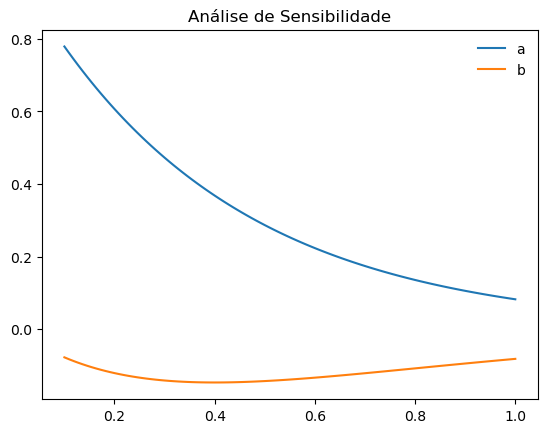

In [41]:
plt.figure()
plt.title("Análise de Sensibilidade")
plt.plot(t_sensibilidade,Sensibilidade.Parametro[0],label='a')
plt.plot(t_sensibilidade,Sensibilidade.Parametro[1],label='b')
plt.legend(frameon=False);

> A ordem dos parâmetros é definida na solução do problema direto (função SPD nesse tutorial)

# Solução do Problema Inverso

Vamos apresentar a solução do problema inverso como um problema de otimização com os seguintes métodos:
* Levember-Marquardt (LM)
* Luus_Jaakola (LJ)
* Evolução Diferencial (DE)
* Enxame de Partículas (PSO)

#### Solução Problema Inverso Levemberg-Marquardt
Para cada método de otimização é possível definir valores para algumas opções específicas opcionais. Essas opções são formuladas como um dicionário em python. 

Chamo atenção para o fato de que, por padrão, essas opções já possuem um valor defaut. Vejamos seus valores:

In [42]:
ip.Levemberg_Marquardt.Defaut

{'Omega': 10, 'MaxIter': 10, 'Tolerancia': 1e-05, 'VerOpcoes': False}

Vamos agora escolher o chute inicial $Z_{0}$ e modificar algumas das opções default

In [43]:
Z0=np.array([2.0,5.0])
Delta_h=np.array([10**-3,10**-3])
opcoesLM={"Omega":10,"MaxIter":10,"Tolerancia":10**-10,"VerOpcoes":True}

Nesse momento podemos resolver o problema inverso. A variável ResultadosLM guarda várias informações relevantes

In [44]:
ResultadosLM=ip.Levemberg_Marquardt(FO,Z0,Delta_h,opcoesLM)

Iteração: 10
 
OPÇÕES LEVEMBERG MARQUARDT
omega inicial=1e+01
omega final=1e-09
Pk= [0.99061238 2.45004763]
Tolerância=1e-10
Valor na FO=3.01407e-03
Numero Máximo de Iterações= 10
Numero de Iterações Utilizado= 10
Passo h=[0.001 0.001]
 


In [46]:
ResultadosLM.Parametros_Estimados

array([0.99061238, 2.45004763])

In [18]:
ResultadosLM.Valor_FO

0.002570053393949831

In [47]:
ResultadosLM.Convergencia

array([0.51650003, 0.40864532, 0.22727718, 0.00967309, 0.00301515,
       0.00301407, 0.00301407, 0.00301407, 0.00301407, 0.00301407])

In [19]:
ResultadosLM.Convergencia

array([0.5044683 , 0.39300259, 0.21804787, 0.00888775, 0.00257075,
       0.00257005, 0.00257005, 0.00257005, 0.00257005, 0.00257005])

In [20]:
ResultadosLM.Custo_Computacional

0.034982919692993164

**Obs:** Todos os outros métodos de minimização possuem essas mesmas características

Vejamos a comparação dos gráficos entre as soluções com os parâmetros exatos e estimados juntamente com os dados experimentais 

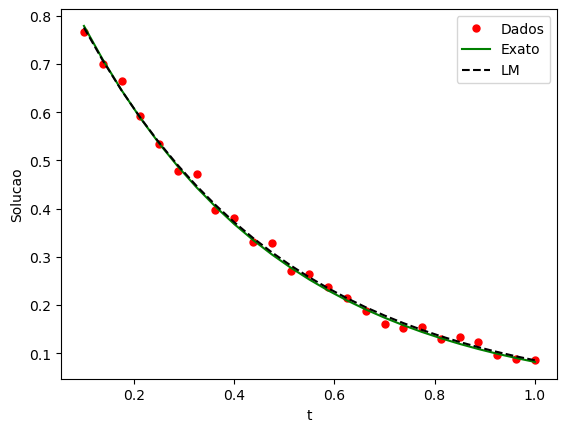

In [48]:
plt.plot(t_exp,Dados_Exp,".r",ms=10)
plt.plot(t_exp,ip.Definicoes_Preliminares.Solucao_PD(Z_exato),"g")
plt.plot(t_exp,ip.Definicoes_Preliminares.Solucao_PD(ResultadosLM.Parametros_Estimados),"--k")
plt.gca().legend(('Dados','Exato','LM'))
plt.xlabel('t')
plt.ylabel('Solucao');

#### Solução Problema Inverso Evolução Diferencial

Vejamos as opções defaut para o evolução diferencial

In [49]:
ip.Evolucao_Diferencial.Defaut

{'F': 0.8, 'CR': 0.5, 'Gmax': 100, 'Tolerancia': 1e-05, 'VerOpcoes': False}

No DE temos que especificar um intervalo de busca para cada parâmetros como uma lista de listas ou lista de tuplas

In [50]:
limites=[(0.0,10.0),(0.0,10.0)]

In [52]:
Tam_Populacao=20
opcoesDE={"F":0.75, "CR":0.9, "Gmax":50, "Tolerancia":10**-10,"VerOpcoes":True}
ResultadosDE=ip.Evolucao_Diferencial(FO,Tam_Populacao,limites,opcoesDE)

Geração: 4

Geração: 50

OPÇÕES EVOLUÇÃO DIFERENCIAL
Tamanho População=20
Numero Máximo de Gerações=50
Numero de Gerações Utilizado=50
Taxa de Mutacao=0.75
Taxa de CrossOver=0.9
Melhor Membro da População=[0.99067365 2.45024545]
Valor na FO=3.014075e-03
Tolerância=1e-10



Vamos mais uma vez os gráficos das curvas de solução usando os parâmetros exatos e os estimados usando o ipsimpy

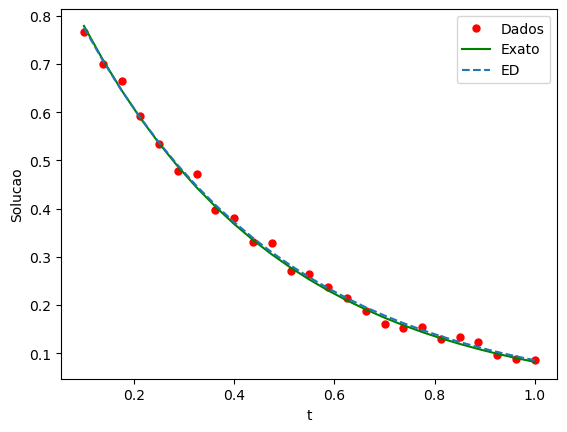

In [54]:
plt.plot(t_exp,Dados_Exp,".r",ms=10)
plt.plot(t_exp,ip.Definicoes_Preliminares.Solucao_PD(Z_exato),"g")
plt.plot(t_exp,ip.Definicoes_Preliminares.Solucao_PD(ResultadosDE.Parametros_Estimados),"--")
plt.gca().legend(('Dados','Exato','ED'))
plt.xlabel('t')
plt.ylabel('Solucao');

#### Solução Problema Inverso PSO

Por fim temos a solução empregando o Particle Swarm Optimization, sendo as opções defaut definidas como

In [55]:
ip.PSO.Defaut

{'w': 0.5,
 'c1': 1.0,
 'c2': 2.0,
 'MaxIter': 100,
 'Tolerancia': 1e-05,
 'VerOpcoes': False}

Aplicando agora o PSO ao problema inverso

In [58]:
limites=([0.0,10.0],[0.0,10.0])
N_particulas=20
opcoesPSO={"w":1.0, "c1":2.05, "c2":2.05, "MaxIter":50, "Tolerancia":10**-10,"VerOpcoes":True}
ResultadosPSO=ip.PSO(FO,N_particulas,limites,opcoesPSO)

Geração: 50
OPÇÕES ENXAME DE PARTÍCULAS (PSO)
Numero de Particulas=20
Numero Máximo de Iterações=50
Numero de Iterações Utilizado=50
w=1.0
c1=2.05
c2=2.05
Tolerancia=1e-10
Melhor Elemento do Enxame= [0.99016728 2.44963786]
Valor na FO=3.014491e-03



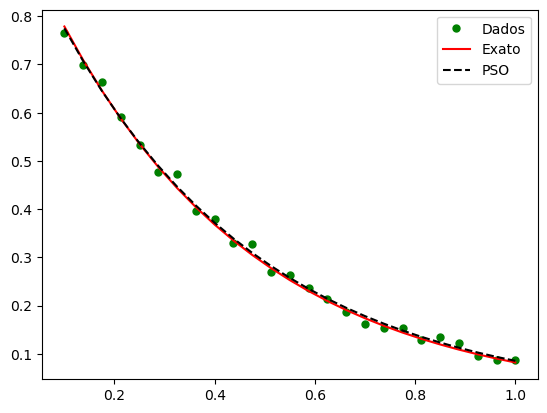

In [59]:
plt.plot(t_exp,Dados_Exp,".g",ms=10)
plt.plot(t_exp,ip.Definicoes_Preliminares.Solucao_PD(Z_exato),"r")
plt.plot(t_exp,ip.Definicoes_Preliminares.Solucao_PD(ResultadosPSO.Parametros_Estimados),"--k")
plt.gca().legend(('Dados','Exato','PSO'))

# Comparação dos Resultados

In [60]:
print("LM   =",ResultadosLM.Parametros_Estimados)
print("DE   =",ResultadosDE.Parametros_Estimados)
print("PSO  =",ResultadosPSO.Parametros_Estimados)

LM   = [0.99061238 2.45004763]
DE   = [0.99067365 2.45024545]
PSO  = [0.99016728 2.44963786]
